<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [ ]:
# Load the Stack Overflow survey dataset
df = pd.read_csv('../Module_2_Data_Wrangling/survey_data.csv')
# file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [154]:
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

In [155]:
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)

In [156]:
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

In [157]:
df['JobSat'].fillna(df['JobSat'].mean(), inplace=True)

In [158]:
df[['Employment','JobSat', 'RemoteWork']].isnull().sum()

Employment    0
JobSat        0
RemoteWork    0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [ ]:
def get_exp(exp):
    if exp == 'Less than 1 year':
        return 0
    elif exp == 'More than 50 years':
        return 51
    try:
        return float(exp)
    except:
        return None
        
df['YearsCodePro'] = df['YearsCodePro'].apply(get_exp)

In [160]:
df['YearsCodePro'].value_counts()

YearsCodePro
2.0     4168
3.0     4093
5.0     3526
10.0    3251
4.0     3215
0.0     2856
6.0     2843
1.0     2639
8.0     2549
7.0     2517
12.0    1777
15.0    1635
20.0    1549
9.0     1493
11.0    1312
13.0    1127
14.0    1082
25.0     998
16.0     946
18.0     867
17.0     814
30.0     689
24.0     632
19.0     516
22.0     492
23.0     448
26.0     426
21.0     380
27.0     380
28.0     342
35.0     285
29.0     196
40.0     194
32.0     194
34.0     169
38.0     134
33.0     132
36.0     119
31.0     106
37.0     104
45.0      56
42.0      55
39.0      54
41.0      51
51.0      50
44.0      42
43.0      37
46.0      21
50.0      14
48.0      14
49.0      11
47.0      10
Name: count, dtype: int64

In [161]:
bins = [0, 5, 10, 20, 50]
labels = ['0-5', '5-10', '10-20', '>20']

df['ExpRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)  
df['ExpRange'].value_counts()

ExpRange
0-5      17641
5-10     12653
10-20    11625
>20       6785
Name: count, dtype: int64

In [162]:
summary = df.groupby('ExpRange')['JobSat'].median().reset_index()
summary

,ExpRange,JobSat
0,0-5,6.935041
1,5-10,6.935041
2,10-20,6.935041
3,>20,6.935041


Text(0, 0.5, 'Median Job Satisfaction')

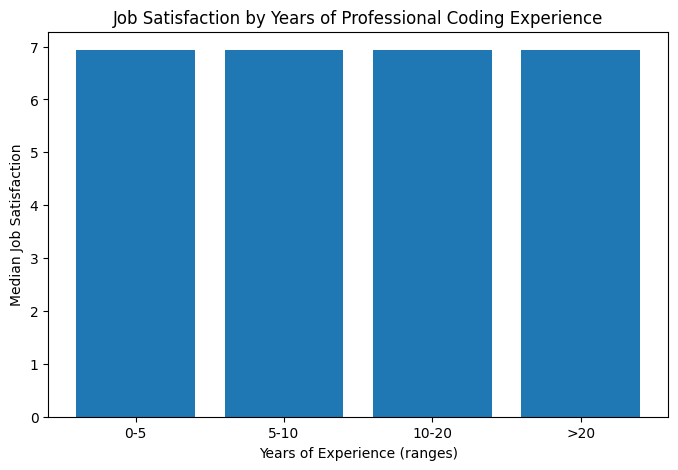

In [163]:
plt.figure(figsize=(8,5))
plt.bar(summary['ExpRange'], summary['JobSat'])
plt.title("Job Satisfaction by Years of Professional Coding Experience")
plt.xlabel("Years of Experience (ranges)")
plt.ylabel("Median Job Satisfaction")

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


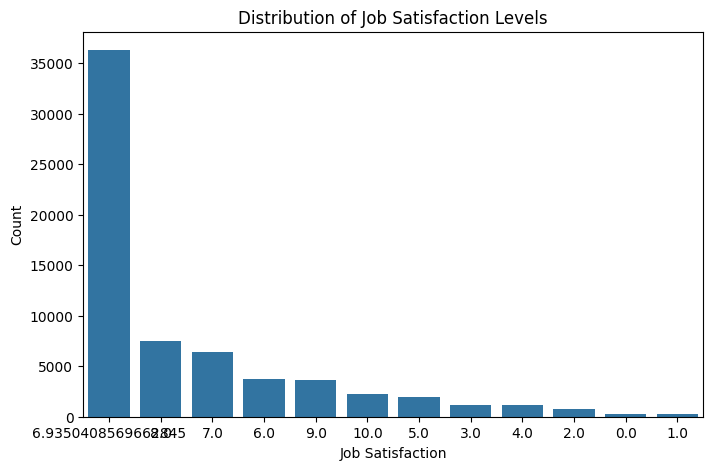

In [165]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobSat', data=df, order=df['JobSat'].value_counts().index)
plt.title("Distribution of Job Satisfaction Levels")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


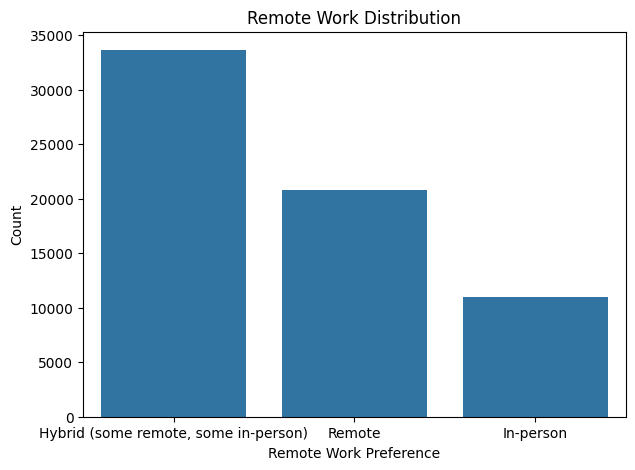

In [166]:
plt.figure(figsize=(7,5))
sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index)
plt.title("Remote Work Distribution")
plt.xlabel("Remote Work Preference")
plt.ylabel("Count")
plt.show()

In [167]:
remote_employment_ct = pd.crosstab(df['RemoteWork'], df['Employment'])
remote_employment_ct

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part-time","Employed, full-t

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [168]:
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_lang = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';'))
df_lang = df_lang.explode('Language')

df_lang['Language'] = df_lang['Language'].str.strip()
df_lang

,Country,LanguageHaveWorkedWith,Language
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells)
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Go
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,HTML/CSS
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Java
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,JavaScript
...,...,...,...
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Lua
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Objective-C
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Python
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Rust


In [169]:
lang_counts = df_lang.groupby(['Country', 'Language']).size().reset_index(name='Count')
lang_counts

,Country,Language,Count
0,Afghanistan,Ada,9
1,Afghanistan,Apex,4
2,Afghanistan,Assembly,7
3,Afghanistan,Bash/Shell (all shells),14
4,Afghanistan,C,13
...,...,...,...
5514,Zimbabwe,Rust,4
5515,Zimbabwe,SQL,15
5516,Zimbabwe,TypeScript,11
5517,Zimbabwe,VBA,2


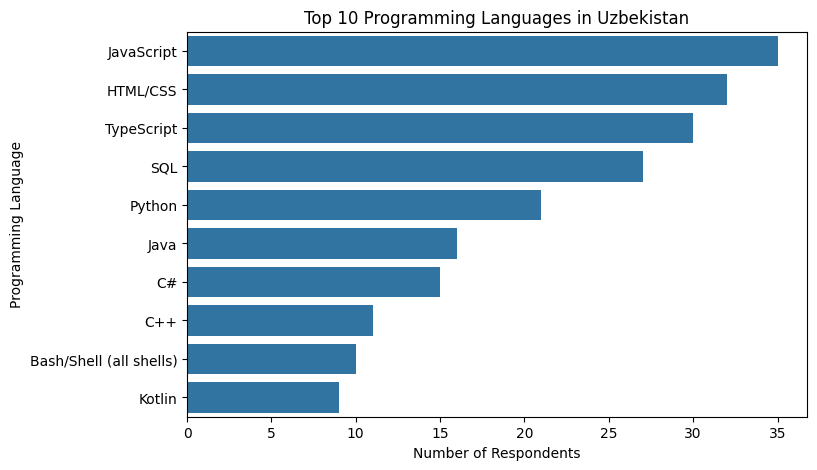

In [172]:
langs = lang_counts[lang_counts['Country'] == 'Uzbekistan']
usa_top = langs.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Language', data=usa_top)
plt.title("Top 10 Programming Languages in Uzbekistan")
plt.xlabel("Number of Respondents")
plt.ylabel("Programming Language")
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


<Axes: xlabel='YearsCodePro', ylabel='JobSatPoints_1'>

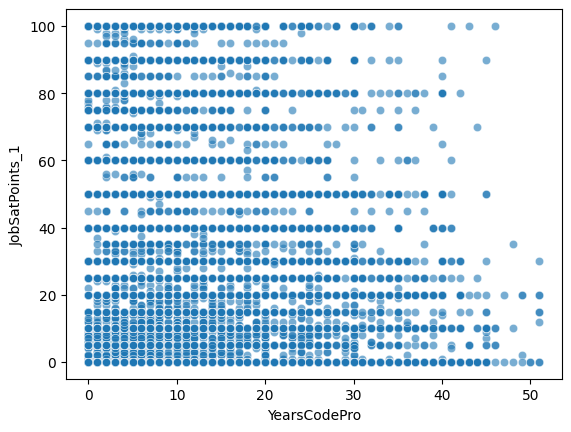

In [171]:
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df, alpha=0.6)


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


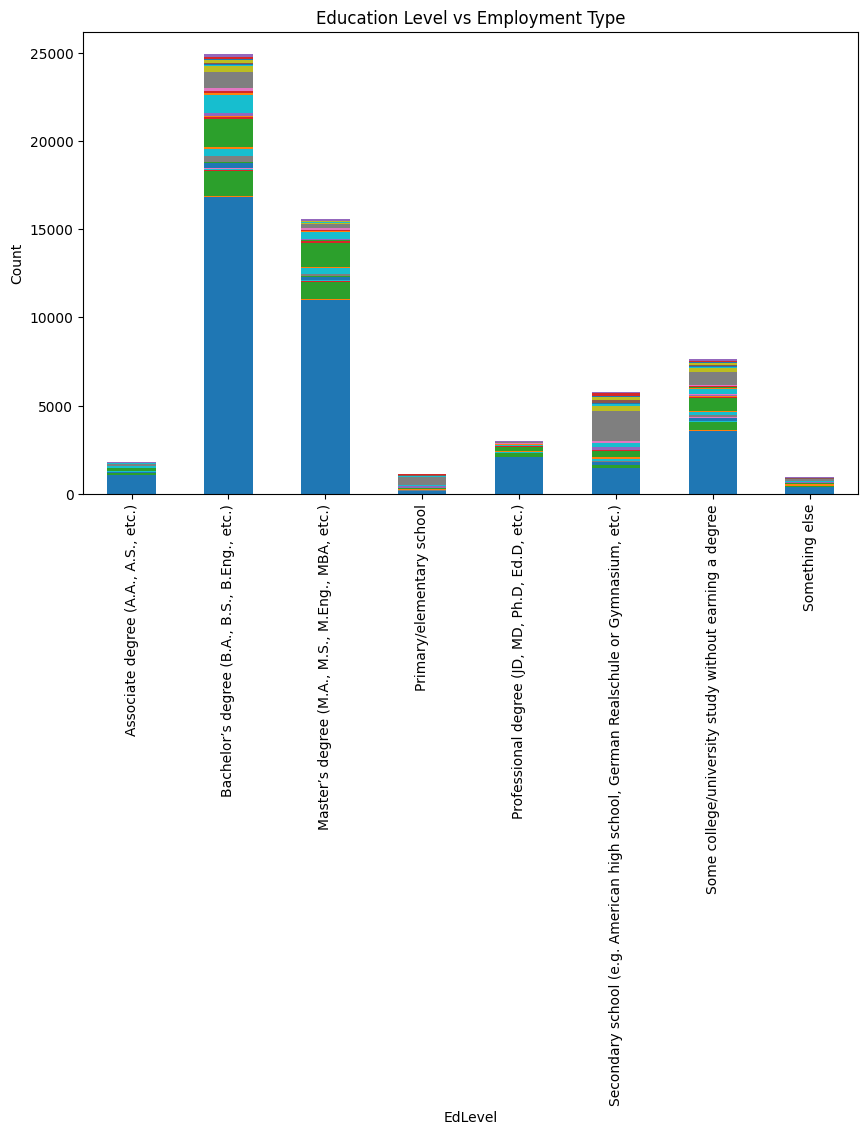

In [176]:
ed_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'])
ed_employment_ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Education Level vs Employment Type")
plt.ylabel("Count")
plt.legend([],[], frameon=False)
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [174]:
df.to_csv("cleaned_analyzed_dataset.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
